You have a function you want to minimize $J(w) = $ cost or error. You can maximize too, just by reversing a sign.

Example:

$ J = w^2 $  

$ Gradient = \frac{dJ}{dw} = 2w$

Set initial $w = 20$, learning rate $= 0.1$.

Iteration 1: $ w \leftarrow \ \ \ 20 - 0.1 * 2 * 20\ \ = 16$  
Iteration 2: $ w \leftarrow \ \ \ 16 - 0.1 * 2 * 16\ \ = 12.8$  
Iteration 2: $ w \leftarrow 12.8 - 0.1 * 2 * 12.8 = 10.24$  

You can see that on each iteration, we get closer and closer to zero, and on each iteration we take smaller and smaller steps, because with each iteration, the slope is decreasing. The values $2 * 20, 2 * 16, 2 * 12.8$ are the slopes / gradients at each iteration ($ 2 * w $)

In [1]:
import numpy as np
w = 20
for i in range(30):
    w = w - 0.1 * 2 * w
print(w)

0.02475880078570761


In [2]:
w = 20
for i in range(100):
    w = w - 0.1 * 2 * w
print(w)

4.0740719526689756e-09


So, by moving slowly in the direction of the gradient of a function, we get closer and closer to the minimum of the function.

Exercise: Optimize $J(w_1, w_2) = w_1^2 + w_2^4$

### Gradient descent for Linear Regression

Cost function to minimize: $ J = (Y - X w)^T (Y - X w) $  
Gradient: $ \frac{\partial J}{\partial w} = - 2 X^T Y + 2 X^T w = 2 X^T (\hat{Y} - Y) $

With gradient descent, you don't set to 0 and solve for w, you just take small steps in this direction. You can also drop the 2 since it's a constant in function to be minimized.

In [ ]:
def gradient_descent():
    # w = draw sample from N (0, 1/D)
    # NOTE: Did not understand why this works
    w = np.random.randn(D) / np.sqrt(D)
    # iterate until change in w is smaller than
    # a predetermined threshold
    threshold = 1e-5
    # or for a decided number of times
    T = 1000
    for t in range(T):
        # update the weight by taking steps in the direction of the vector
        w = w - learning_rate * np.dot(X.T, Y - X.dot(w))
        if abs(w - w_prev) < threshold:
            break
    return w

### Learning rate
- Learning rate is a hyperparameter (not a part of the model itself, but is used to find a solution
- Doesn't matter so much for Linear Regression
- But if it is too big, it won't converge... It will bounce back and forth across the two sides of the 'valley'
- And if it is too small, it will take a lot of time to converge
- Finding the right hyperparameters is an active area of research, and the best you can do right now is practice a lot and gain some intuition.

### Bypassing the dummy variable trap with Gradient descent

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 10
D = 3

X = np.zeros((N, D))
X[:,0] = 1
X[:5,1] = 1
X[5:,2] = 1

X

array([[ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.]])

In [6]:
Y = np.array([0]*5 + [1]*5)
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

LinAlgError: Singular matrix

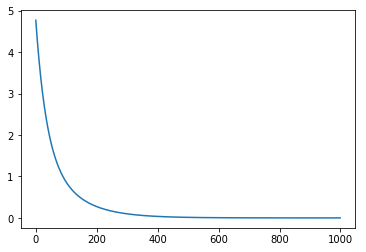

In [8]:
costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
for t in range(1000):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate * X.T.dot(delta)
    mse = delta.dot(delta) / N
    costs.append(mse)
    
plt.plot(costs)

In [9]:
# solution
w

array([-0.18936359,  0.19871891,  1.18000736])

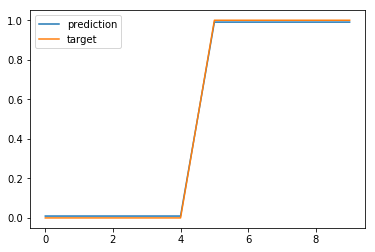

In [10]:
plt.plot(Yhat, label='prediction')
plt.plot(Y, label='target')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
D = 3
x = [np.random.randn(D) / np.sqrt(D) for _ in range(1000)]

In [ ]:
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('weights')
plt.ylabel('Probability')

plt.show()

KeyboardInterrupt: 